<a href="https://colab.research.google.com/github/Tejas-0001/Computer_Vision/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture-1**

- **Human Vision** - 3D,Dynamic
- **Computer Vision** - 2D,Stationary
- **Image Processing** - 2D to processed/enhanced 2D Image like smoothing,edge extraction
- **Computer Graphics** - Create 2D image to Render 3D Object | Imitating Geometric Structure
- **Computer Vision** - Imitate Human Vision | Given 2D extract 3D Features | Depth estimation, Denoising, Deconvolution, Super-resolution, Image reconstruction, Image registration.

### **Computer Vision Problems are ill-posed Inverse Problem:**
*Given effects, find cause*
##### Given the image (2D), estimate attributes related to third coordinate (3D) of the scene
- Problem is well posed if all of them satisfies together
- Solution exists
- Solution Unique
- Solution is consistent


### Inverse Problem
---
###### **H : X -> Y**
Here H is Operator (camera / Imaging System) which converts x ∈ X Real 3D world to y ∈ Y a vector representation in 2D.
###### Mathematically : H{x} = y
### Aim is to develop a reconstruction algorithm to find original x from y
- *And that is Inverse problem because we are using approximate algorithm to find real image because it's impossible to find the original algorithm as of now*


# **Method - 1 | Objective Function | Build Handcrafted Reconstruction function**
---
- It is also known as cost function which is mathematical expression used to find difference between Predicted o/p and actual values. It acts as criterion for evaluating how well a model performs.
- It is used in optimization algorithm like gradient Descent to update model parameter to reduce loss.


## Approach - 1

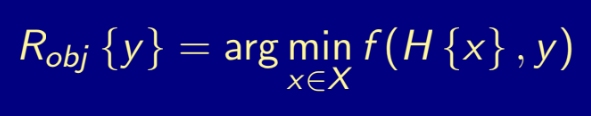



#### The function f measures cost/loss which evaluates how well model output H{x} fairs to ground truth y. Here the H can be neural network or approximation algorithm. x is the input image.
- Goal is to find x that minimizes f.
- This still lead to ill posedness.

## Approach - 2

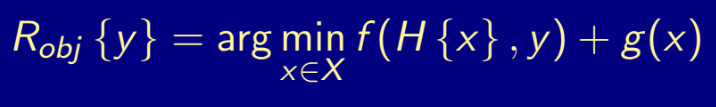

#### This objective function f is same as above and g(x) is a regularization term that adds constraints and penalties , it is used to enforce certain properties and prevent overfitting by discouraging complex unrealistic solution.g(x) can be:
- prior - encode smoothness or certain structural properties
- L1 Regularization (Lasso Regression) penalizes absolute value of x
- L2 Regularization (Ridge Regression) penalizes large x
- Sparsity Constraint - encourage many x which gives zero
#### It aims to find input that not only minimizes loss g(x) but also follow constraint.
- It makes the problem better posed.



#### Challenege here is every new problem requires its own accurate and efficient H,g,f.

# **Method - 2 | Learning Based Approach | Train Parameterized function (Model) from training data**
---
- It leverages ML Algo to learn automatically and improve without being explicitly programmed with specific rules.

## Approach - 1
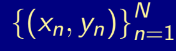
#### Ground truth image and their corresponding measurements are known.

## Approach - 2
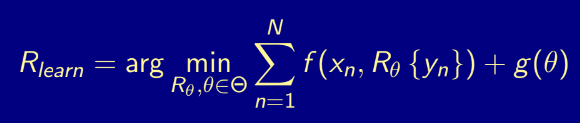
##### f is loss/cost fn measuring how well model o/p Rθ{yn} matches true target yn for given input xn. g(θ) is the regularization term used to add constraint &penalties and prevent overfitting by discouraging over complex solution.
- ∑ implies it measures total loss acorss the whole dataset.
- goal is to find the parameter set 𝜃 that minimizes the total cost function.
- Rθ: Represents the neural network with parameters.
##### Once the learning step is complete, Rlearn can then be used to reconstruct a new image from its measurements.


# **Training**

## Generating training data
- Denoising - Corrupting clean image with noise
- Super Resolution - Downsampling Image
- Deblurring - Adding blur
- Medical Image reconstruction from sparse measurement

## Preprocessing
- Model Underlying Physics using established techniques
- Control dynamic range of input data
- Discard image with low SNR


## Training Size
- Data Augmentation
- Transfer learning (use of pretrained Network)

# NMF

Feature Reduction , classification
###### 3 steps -
1. Setting up data for algo
- Images should have similar gray across all **n** images aand for best result size of face and eyes cordinate should be similar across all images.
- First image is flattened in 1D vector **(f)** (1 X m) and after converting all the images we concatenate all to form **matrix F** (m x n). F = [f1,f2,........fn] in F every row represent a feature and every column represent observation of various images.
2. Non - Negative matrix factorization
- Decompose F in W X H by minimizing Euclidean norm || F - WH || <sub>2</sub> = √ ΣΣ(F - WH)<sub>ij</sub><sup>2</sup> we can also use KL divergance. The algo for solving NMF using Euclidean norm is called alternating least squares.
- Initialize w and H randomly. F = W X H , f<sub>1</sub> = W X h<sub>1</sub> f<sub>2</sub> = W X h<sub>2</sub>, ....... f<sub>n</sub> = W X h<sub>n</sub>
each equation is overdetermined system of form Ax = b
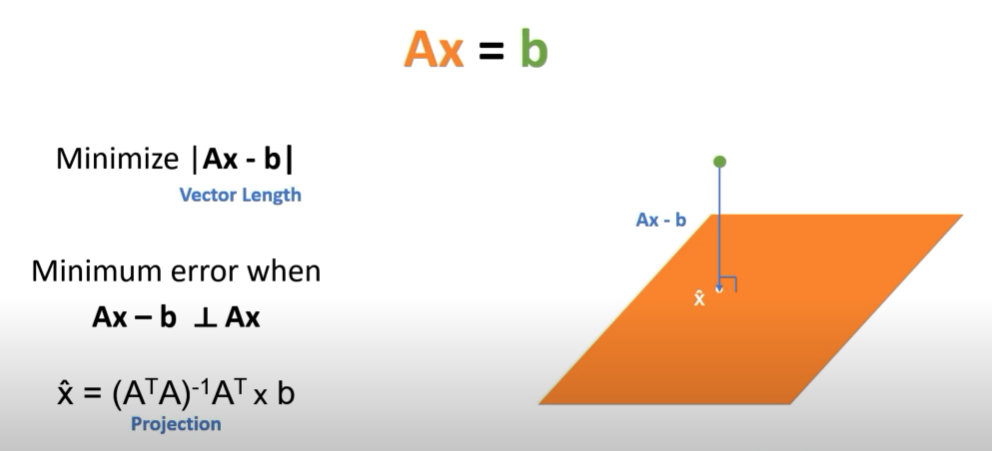
- We obtain sol. for each of the eqn. in form X<sup>^</sup> = (A<sup>T</sup>A)<sup>-1</sup>A<sup>T</sup> x b
f<sub>1</sub> = W X h<sub>1</sub> = h<sub>1</sub> = (W<sup>T</sup>W)<sup>-1</sup>W<sup>T</sup> x f1
-Now we take transpose of the eqn. and do the same thing for the w
f<sub>1</sub> = H X w<sub>1</sub> = w<sub>1</sub> = (H<sup>T</sup>H)<sup>-1</sup>H<sup>T</sup> x f1
- Repeat Iteration between alternating W and H until we eventually reach a local Minima.Since every euclidean distance will decrease with each iteration.
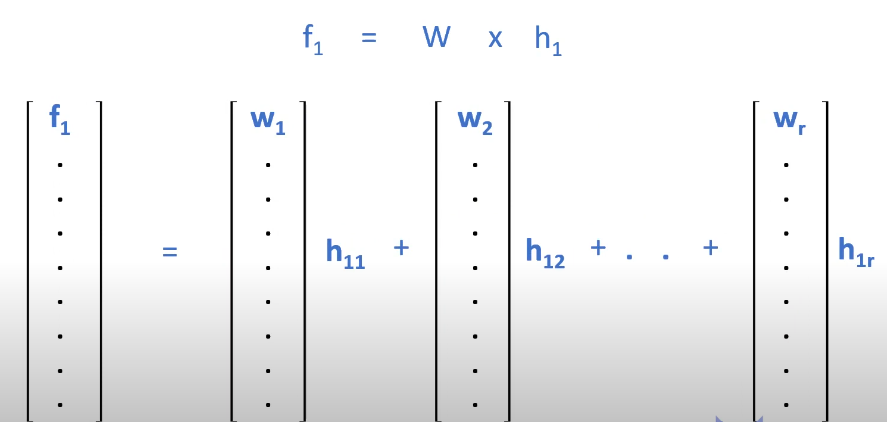
- w<sub>i</sub><sup>'s</sup> = Basis Vectors
- h<sub>k</sub><sup>'s</sup> = Weight / Encoding for the images
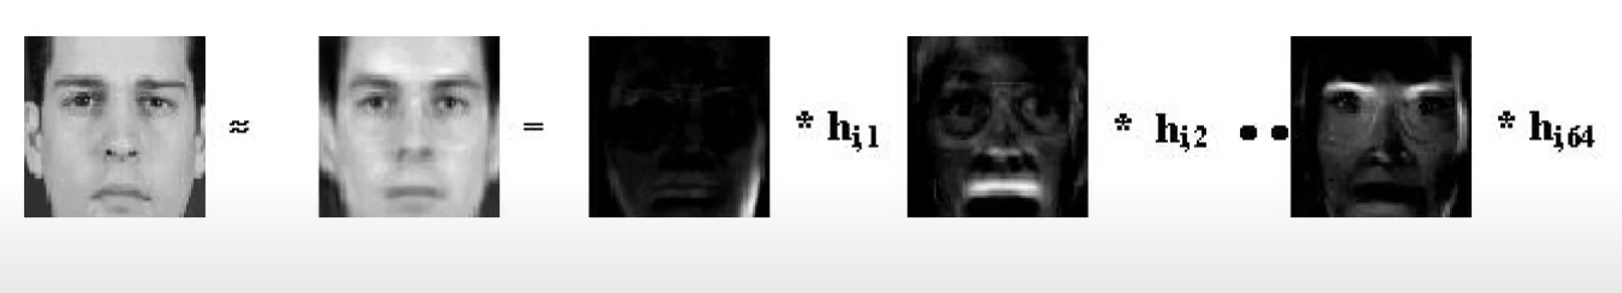
3. Application (Testing Face recognition)
- Flatten the image (i)
- Represent i in term of our basis vector W i.e find h' from eqn. i = W x h'
- h' = (W<sup>T</sup>W)<sup>-1</sup>W<sup>T</sup> x i (least sq. soln.)
- take dot product with every h to calculate score and find which encoding matches the sol'n in best way.
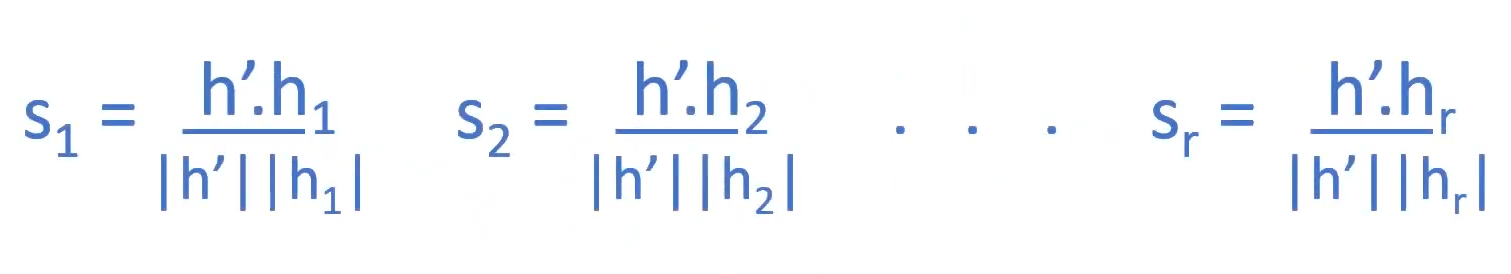
- i* = arg max S <sub>i</sub> and the input is labelled as to be same as f<sub>i</sub><sup>th</sup> face if  S<sub>i</sub> > h<sub>threshold</sub> else we say it doesn't match any face
## Dataset used is ORL Faces , No of training image 80, basis image component in NMF : 32
### Performs pretty good in face recognition
